In [281]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

user_id = os.listdir("clean_data")
user_id.remove('.ipynb_checkpoints')

In [109]:
def get_clean_paths(user, fork_or_spoon= 'fork'):
    parent_path = "clean_data/" + user + '/' + fork_or_spoon
    #dir_list = os.listdir(parent_path)
    EMG_eating_txt_path = parent_path + "/" + "eating_EMG.txt"
    EMG_not_eating_txt_path = parent_path + "/" + "not_eating_EMG.txt"
    IMU_eating_txt_path = parent_path + "/" + "eating_IMU.txt"
    IMU_not_eating_txt_path = parent_path + "/" + "not_eating_IMU.txt"
    master_EMG_path = parent_path + "/" + "master_dfEMG.txt"
    master_IMU_path = parent_path + "/" + "master_dfIMU.txt"
    return (master_EMG_path, EMG_eating_txt_path, EMG_not_eating_txt_path, master_IMU_path, IMU_eating_txt_path, IMU_not_eating_txt_path)

def get_clean_df(user = "user10", data_for="EMG", fork_or_spoon="fork", eating=True, master=False):
    paths = get_clean_paths(user, fork_or_spoon)
    if data_for == "EMG":
        if master:
            return pd.read_csv(paths[0], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[1], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[2], sep=",", index_col=0)

    elif( data_for == "IMU"):
        if master:
            return pd.read_csv(paths[3], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[4], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[5], sep=",", index_col=0)
    

# RMS

In [110]:
# RMS_feature_extraction(df1,df2)
# RMS_feature_extraction(df1_IMU,df2_IMU)
def RMS_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
        n = (df1.iloc[:,1:-1]).shape[0]
    else:
        axis = 1 
        n = (df1.iloc[:,1:-1]).shape[1]
    if get_feature_data:
        eating_feature_data = ((((df1.iloc[:,1:-1]**2).sum(axis))/n).pow(1/2))
        non_eating_feature_data = (((df2.iloc[:,1:-1]**2).sum(axis)/n).pow(1/2))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((((df1.iloc[:,1:-1]**2).sum(axis))/n).pow(1/2)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]**2).sum(axis)/n).pow(1/2).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in RMS_feature_extraction()")

# avg

In [111]:
# AVG_feature_extraction(df1,df2)
# AVG_feature_extraction(df1_IMU,df2_IMU)
def AVG_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).abs().mean(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).abs().mean(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).abs().mean(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().mean(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# min

In [112]:
# MIN_feature_extraction(df1,df2)
def MIN_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).min(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).min(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).min(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).min(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in MIN_feature_extraction()")

# max

In [113]:
# MAX_feature_extraction(df1,df2)
# MAX_feature_extraction(df1_IMU,df2_IMU)
def MAX_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
        
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).abs().max(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).abs().max(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).abs().max(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).abs().max(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

# std

In [114]:
# STD_feature_extraction(df1,df2)
# STD_feature_extraction(df1_IMU,df2_IMU)
def STD_feature_extraction(df1,df2,col_wise=True,user="user10", get_feature_data=False):
    if col_wise:
        axis = 0
    else:
        axis = 1 
        
    if get_feature_data:
        eating_feature_data = ((df1.iloc[:,1:-1]).std(axis))
        non_eating_feature_data = ((df2.iloc[:,1:-1]).std(axis))
        return ( (pd.DataFrame(eating_feature_data)).T, (pd.DataFrame(non_eating_feature_data)).T )
    
    try:
        ax = ((df1.iloc[:,1:-1]).std(axis)).plot(label='eating',legend=True)
        ((df2.iloc[:,1:-1]).std(axis)).plot(ax=ax,label='not eating',legend=True, title=user)
        plt.xticks(rotation=70)
        plt.show()
    except:
        print("error in AVG_feature_extraction()")

In [218]:
#get_clean_df(user = "user10", data_for="EMG", fork_or_spoon="fork", eating=True, master=False)

In [282]:
feature_df = pd.DataFrame()

for user in user_id:
    for item in ['fork','spoon']:

        df1 = get_clean_df(user=user, fork_or_spoon=item, eating=True)
        df2 = get_clean_df(user=user, fork_or_spoon=item, eating=False)
        #df1_IMU = get_clean_df(data_for="IMU",eating=True,user=user)
        #df2_IMU = get_clean_df(data_for="IMU",eating=False,user=user)

        (STD_eating_EMG, STD_non_eating_EMG) = STD_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
        (MAX_eating_EMG, MAX_non_eating_EMG) = MAX_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
        (MIN_eating_EMG, MIN_non_eating_EMG) = MIN_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
        (AVG_eating_EMG, AVG_non_eating_EMG) = AVG_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)
        (RMS_eating_EMG, RMS_non_eating_EMG) = RMS_feature_extraction(df1,df2,col_wise=True,user=user,get_feature_data=True)

        STD_eating_EMG.columns = [str(col) + ' ' + 'STD' for col in STD_eating_EMG.columns]
        MAX_eating_EMG.columns = [str(col) + ' ' + 'MAX' for col in MAX_eating_EMG.columns]
        MIN_eating_EMG.columns = [str(col) + ' ' + 'MIN' for col in MIN_eating_EMG.columns]
        AVG_eating_EMG.columns = [str(col) + ' ' + 'AVG' for col in AVG_eating_EMG.columns]
        RMS_eating_EMG.columns = [str(col) + ' ' + 'RMS' for col in RMS_eating_EMG.columns]

        STD_non_eating_EMG.columns = [str(col) + ' ' + 'STD' for col in STD_non_eating_EMG.columns]
        MAX_non_eating_EMG.columns = [str(col) + ' ' + 'MAX' for col in MAX_non_eating_EMG.columns]
        MIN_non_eating_EMG.columns = [str(col) + ' ' + 'MIN' for col in MIN_non_eating_EMG.columns]
        AVG_non_eating_EMG.columns = [str(col) + ' ' + 'AVG' for col in AVG_non_eating_EMG.columns]
        RMS_non_eating_EMG.columns = [str(col) + ' ' + 'RMS' for col in RMS_non_eating_EMG.columns]

        #feature_df = STD_eating_EMG.append(MAX_eating_EMG)

        # feature_df = (STD_eating_EMG
        #     .append(MAX_eating_EMG)
        #     .append(MIN_eating_EMG)
        #     .append( AVG_eating_EMG)
        #     .append(RMS_eating_EMG)
        #     )
        eating_row = (STD_eating_EMG
                      .join(MAX_eating_EMG)
                      .join(MIN_eating_EMG)
                      .join(AVG_eating_EMG)
                      .join(RMS_eating_EMG)
                     )
        eating_row['eating'] = True
        feature_df = feature_df.append(eating_row,ignore_index=True)

        non_eating_row = (STD_non_eating_EMG
                      .join(MAX_non_eating_EMG)
                      .join(MIN_non_eating_EMG)
                      .join(AVG_non_eating_EMG)
                      .join(RMS_non_eating_EMG)
                     )
        non_eating_row['eating'] = False
        feature_df = feature_df.append(non_eating_row,ignore_index=True)
    
    

In [283]:
feature_df
backup_feature_df = feature_df
backup_feature_df.tail()

,EMG 1 STD,EMG 2 STD,EMG 3 STD,EMG 4 STD,EMG 5 STD,EMG 6 STD,EMG 7 STD,EMG 8 STD,EMG 1 MAX,EMG 2 MAX,...,EMG 8 AVG,EMG 1 RMS,EMG 2 RMS,EMG 3 RMS,EMG 4 RMS,EMG 5 RMS,EMG 6 RMS,EMG 7 RMS,EMG 8 RMS,eating
107,6.095540,10.404620,7.387109,6.407693,7.028805,3.852282,3.344967,6.386664,92,98,...,3.721990,6.140282,10.427184,7.393582,6.497607,7.077117,3.934163,3.422149,6.441627,False
108,7.934144,9.042679,5.797945,3.145758,4.788647,2.540302,2.813888,11.214470,74,67,...,7.525323,7.964371,9.075527,5.843948,3.239374,4.853397,2.663132,2.926269,11.241464,True
109,6.636713,8.943604,5.553884,3.890602,6.185798,3.267127,2.683515,11.291536,64,127,...,6.086734,6.672530,8.984255,5.613555,3.970596,6.237409,3.357241,2.798290,11.314442,False
110,8.772692,9.234925,5.621809,3.376209,5.790983,2.921398,3.136510,13.836830,71,78,...,8.211947,8.797526,9.274788,5.675388,3.470172,5.851642,3.021571,3.234658,13.856522,True
111,6.517773,8.107521,5.225661,4.560541,14.729054,3.619572,2.908054,21.064570,113,125,...,11.000850,6.553288,8.150033,5.280362,4.632062,14.750735,3.701788,3.017135,21.076462,False


# Make the feature matrix

In [ ]:
# total_samples = 2*df1.shape[0]
feature_df = pd.DataFrame() 
feature_df['min'] = ((data_df.iloc[:,1:-1]).abs().min(1))
feature_df['max'] = ((data_df.iloc[:,1:-1]).abs().max(1))
feature_df['STD'] = ((data_df.iloc[:,1:-1]).std(1))
feature_df['AVG'] = (data_df.iloc[:,1:-1]).abs().mean(1)
feature_df['RMS'] = (((data_df.iloc[:,1:-1]**2).sum(1))/8).pow(1/2)
def get_data_df(df1,df2):
    return df1.append(df2, ignore_index=True)

def get_feature_df(df1, data_df):
    total_samples = 2*df1.shape[0]
    feature_df = pd.DataFrame() 
    feature_df['min'] = ((data_df.iloc[:,1:-1]).abs().min(1))
    feature_df['max'] = ((data_df.iloc[:,1:-1]).abs().max(1))
    feature_df['STD'] = ((data_df.iloc[:,1:-1]).std(1))
    feature_df['AVG'] = (data_df.iloc[:,1:-1]).abs().mean(1)
    feature_df['RMS'] = (((data_df.iloc[:,1:-1]**2).sum(1))/8).pow(1/2)
    return feature_df

# PCA

In [222]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [483]:
# pca = PCA()
# pca.fit(X)
# pca.explained_variance_ratio_
# pca.explained_variance_
# eigenvalues = pca.explained_variance_
# eigenvectors = pca.components_
# X.dot(eigenvectors[0])
# #plt.plot(eigenvectors[0])
# #plt.show()
# X.dot(eigenvectors[0])
#pca_2 = PCA()
#principalComponents = pca_2.fit_transform(X_std)
#pd.DataFrame(data=principalComponents)#, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [501]:
#data_df = get_data_df(df1,df2)
#feature_df = get_feature_df(df1, data_df)

X = feature_df.iloc[:,:-1]
X_std = StandardScaler().fit_transform(feature_df.iloc[:,:-1])


In [509]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [510]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
17.47074121599448
4.999645682688501
4.26169465827622
2.7284384459948985
2.409274556291415
2.0279670748440624
1.4524024352456937
0.8007890569774897
0.7066114742562303
0.5619543279933875
0.5414868947842081
0.4798327057157851
0.3709918037549543
0.33326217543229053
0.25432257264361036
0.18390906063763005
0.14926798431255317
0.13092573039638405
0.09600845211523774
0.07625809283023435
0.06576515315361499
0.05522177133888863
0.05208026783901775
0.04261469513660253
0.026939960593782092
0.024548022789852547
0.016928634614808195
0.013184716579245163
0.009773080910776772
0.008813249852217524
0.005313355087020021
0.003333131195161883
2.358285819705672e-05
1.552179637888672e-05
8.68974684965174e-06
5.109488823304407e-06
3.874042395673518e-06
1.5249871159580302e-06
9.725369521701334e-07
6.446274088919479e-07


In [511]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

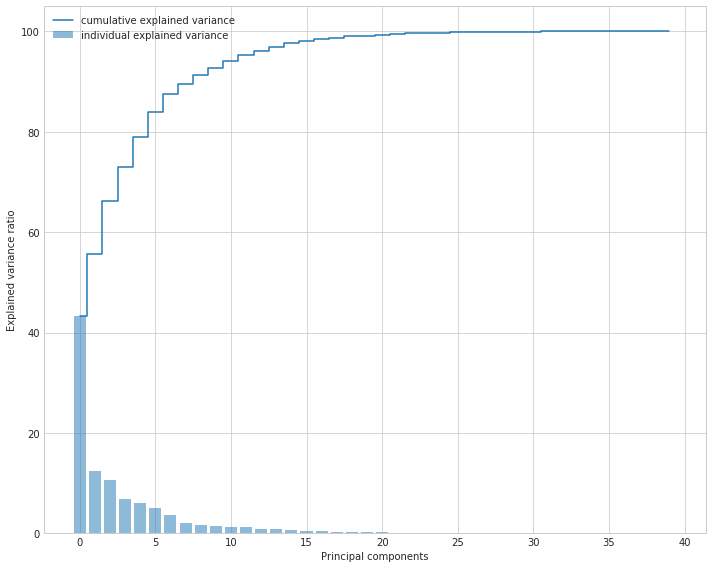

In [512]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(40), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(40), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [513]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(40,1),
                      eig_pairs[1][1].reshape(40,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.09804676  0.19134911]
 [ 0.12288688  0.26673564]
 [ 0.17899948  0.08259606]
 [ 0.17513228 -0.19135481]
 [ 0.18898155 -0.08470415]
 [ 0.19838327 -0.15682839]
 [ 0.19023351 -0.16098503]
 [ 0.16191414 -0.11888042]
 [ 0.15330023  0.14896422]
 [ 0.13992379  0.20577595]
 [ 0.15333687  0.12827687]
 [ 0.16198967 -0.00206179]
 [ 0.16212339  0.12555752]
 [ 0.17477784  0.07443877]
 [ 0.17931781  0.02928373]
 [ 0.119433    0.03068128]
 [-0.14735847 -0.15804313]
 [-0.1553931  -0.20279497]
 [-0.16204222 -0.12009709]
 [-0.16026237 -0.03628834]
 [-0.15571911 -0.15401645]
 [-0.17287565 -0.10423287]
 [-0.1874676  -0.01043032]
 [-0.11820963  0.00606164]
 [ 0.07841523  0.18067498]
 [ 0.08295147  0.27068439]
 [ 0.14042318  0.09410661]
 [ 0.15170431 -0.23028025]
 [ 0.17027309 -0.15767928]
 [ 0.15613262 -0.2362271 ]
 [ 0.14421619 -0.24513699]
 [ 0.15308942 -0.15470904]
 [ 0.09801316  0.1913525 ]
 [ 0.1228616   0.26680244]
 [ 0.17909927  0.0824257 ]
 [ 0.17488601 -0.1921266 ]
 [ 0.1887259  -0.

In [516]:
#y = data_df.iloc[:,-1]
y = feature_df.iloc[:,-1]
#y == False
Y = X_std.dot(matrix_w)
Y[0]

array([-4.40178545, -1.70503626])

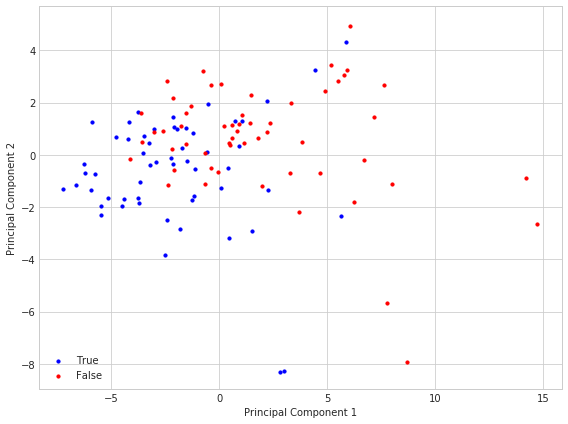

In [452]:

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, color in zip((True, False),
                        ('blue', 'red')):
        
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=color,
                    s=10)
                   
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

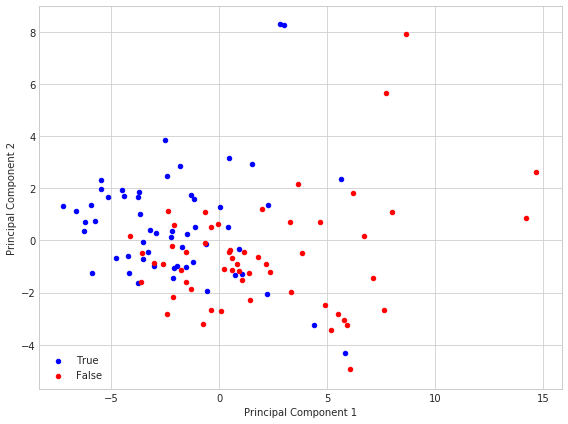

In [518]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((True,False),
                        ('blue','red')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col,
                    s=20)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

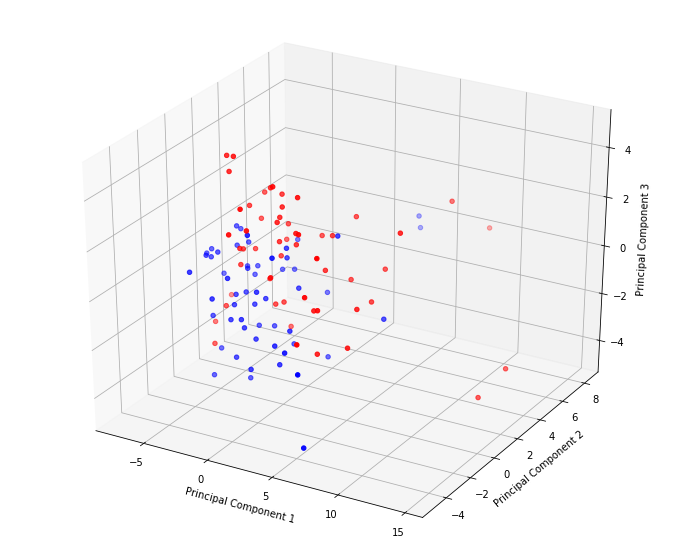

In [454]:
from mpl_toolkits.mplot3d import Axes3D
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')

for lab, col in zip((True,False),
                        ('blue','red')):
        ax.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    Y_sklearn[y==lab, 2],
                    label=lab,
                    c=col)

#ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [566]:
sklearn_pca = sklearnPCA(n_components=2)
#Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn_test = sklearn_pca.fit(X_std)
Y_sklearn_test_transform = sklearn_pca.transform(X_std)

In [576]:
Y_sklearn_test
#Y_sklearn_test.explained_variance_ratio_
#Y_sklearn_test.explained_variance_
#eigenvalues = Y_sklearn_test.explained_variance_
eigenvectors = Y_sklearn_test.components_

matrix_w_test = np.hstack((eigenvectors[0].reshape(40,1),
                      eigenvectors[1].reshape(40,1)))

#print('Matrix W:\n', matrix_w_test)

#X_std.dot(matrix_w)
cov_mat_test = np.cov(X_std.T)
eig_vals_test, eig_vecs_test = np.linalg.eigh(cov_mat_test)
eig_pairs_test = [(eig_vals_test[i], eig_vecs_test[:,i]) for i in range(len(eig_vals_test))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs_test.sort(key=lambda x: x[0], reverse=True)

In [577]:
eig_pairs_test[1][1]

array([ 0.19134911,  0.26673564,  0.08259606, -0.19135481, -0.08470415,
       -0.15682839, -0.16098503, -0.11888042,  0.14896422,  0.20577595,
        0.12827687, -0.00206179,  0.12555752,  0.07443877,  0.02928373,
        0.03068128, -0.15804313, -0.20279497, -0.12009709, -0.03628834,
       -0.15401645, -0.10423287, -0.01043032,  0.00606164,  0.18067498,
        0.27068439,  0.09410661, -0.23028025, -0.15767928, -0.2362271 ,
       -0.24513699, -0.15470904,  0.1913525 ,  0.26680244,  0.0824257 ,
       -0.1921266 , -0.0847058 , -0.15776173, -0.16150461, -0.11900596])

In [569]:
eigenvectors[1]

array([-0.19134911, -0.26673564, -0.08259606,  0.19135481,  0.08470415,
        0.15682839,  0.16098503,  0.11888042, -0.14896422, -0.20577595,
       -0.12827687,  0.00206179, -0.12555752, -0.07443877, -0.02928373,
       -0.03068128,  0.15804313,  0.20279497,  0.12009709,  0.03628834,
        0.15401645,  0.10423287,  0.01043032, -0.00606164, -0.18067498,
       -0.27068439, -0.09410661,  0.23028025,  0.15767928,  0.2362271 ,
        0.24513699,  0.15470904, -0.1913525 , -0.26680244, -0.0824257 ,
        0.1921266 ,  0.0847058 ,  0.15776173,  0.16150461,  0.11900596])

In [447]:
Y_sklearn[0]

array([-4.40178545,  1.70503626, -0.71479164])

In [449]:
Y[0]

array([-4.40178545, -1.70503626])

In [482]:
Y_sklearn_test_transform[0]

array([-4.40178545,  1.70503626, -0.71479164])

In [415]:
sorted_eigen_vectors = []
for eigen_tuple in eig_pairs:
    sorted_eigen_vectors.append(eigen_tuple[1])
    
eigen_vectors_df = pd.DataFrame(sorted_eigen_vectors)
eigen_vectors_df.columns = (feature_df.iloc[:,:-1]).columns
a = eigen_vectors_df.iloc[0].sort_values(ascending=False)
pd.DataFrame(a).style.background_gradient() 

,0
EMG 6 STD,0.198383
EMG 6 RMS,0.198072
EMG 7 STD,0.190234
EMG 7 RMS,0.190138
EMG 5 STD,0.188982
EMG 5 RMS,0.188726
EMG 7 MAX,0.179318
EMG 3 RMS,0.179099
EMG 3 STD,0.178999
EMG 4 STD,0.175132


In [385]:
eig_pairs[0][1][3]

0.17513228497380512

In [396]:
eigen_vectors_df.iloc[1].sort_values(ascending=False).head()

EMG 2 AVG    0.270684
EMG 2 RMS    0.266802
EMG 2 STD    0.266736
EMG 2 MAX    0.205776
EMG 1 RMS    0.191353
Name: 1, dtype: float64